# **BIKE SHARING DATASET**

[Sumber data](https://drive.google.com/drive/folders/17Mw_4wSRiBB5vLLQJN137AlAbyB3CLFx) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing (Data Cleaning, Feature Selection, Feature Engineering)
4. Modeling (Algorithm, Evaluation Metrics)
5. Conclusion
6. Recommendation / Improvement

***

## **Business Problem Understanding**

**Context**

**Capital Bikeshare** adalah sebuah sistem peminjaman sepeda yang terletak di Amerika Serikat. Sistem peminjaman sepeda ini merupakan generasi baru dari rental sepeda tradisional dimana seluruh prosesnya seperti sistem keanggotaan, penyewaan, dan pengembalian telah dilakukan secara otomatis. Melalui sistem ini, pengguna mampu dengan mudah menyewa sepeda dari satu lokasi tertentu dan mengembalikkannya di lokasi yang lain. Saat ini, terdapat sekitar lebih dari 500 program *bike-sharing* di seluruh dunia dengan lebih dari 500.000 sepeda. **Capital Bikeshare** sendiri memiliki lebih dari 600 stasiun dan sekitar 5.000 sepeda yang tersebar di wilayah Washington. Kebutuhan terhadap sistem ini semakin meningkat dikarenakan permasalahan isu lalu lintas, lingkungan, dan kesehatan.

Data yang digunakan dalam project ini adalah data kondisi cuaca, musim, tanggal dan jam, serta total penyewa. Dari data tersebut, dapat dipelajari dan dianalisis keterkaitan antar fitur, sehingga dapat diperoleh metode untuk memprediksi perkiraan sepeda yang diperlukan pada waktu dengan kondisi tertentu.

**Problem Statement**

Problem dalam sistem peminjaman ini yaitu mengenai penyediaan jumlah unit sepeda yang cukup di setiap kondisi dan situasinya. Jika tidak, maka dapat gagal dalam memenuhi tuntutan dari pengguna sistem peminjaman sepeda tersebut dan bahkan bisa berujung kepada hilangnya kepercayaan pelanggan. Namun apabila jumlah ketersediaan sepeda terlalu banyak, hal itu bisa menyebabkan banyaknya unit sepeda yang tidak terpakai, dalam kata lain, tidak efisien. Dimana hal tersebut bisa berimbas kepada membengkaknya biaya manajemen, logistik, serta perawatan untuk tiap unit sepeda.

**Goals**

Berdasarkan permasalahan tersebut, diperlukan adanya suatu tools yang dapat memprediksi perkiraan penyewa pada waktu dan kondisi tertentu sehingga penyedia layanan Bike sharing dapat menentukan total unit sepeda yang harus dipersiapkan untuk masa mendatang.

**Analytic Approach**

Untuk mencapai tujuan tersebut, pada project ini akan dilakukan proses analisis data untuk dapat menemukan pola dari fitur - fitur yang ada, yang memberikan informasi Bike sharing pada tanggal dan jam tertentu.

Selanjutnya, akan dibangun model regresi yang akan membantu penyedia layanan Bike sharing untuk memprediksi perkiraan total penyewa pada waktu tertentu.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah MAE, MAPE, dan RMSE. Semakin mendekati nol nilai MAE, MAPE, dan RMSE yang dihasilkan, berarti model semakin akurat dalam memprediksi total penyewa sesuai dengan limitasi fitur yang digunakan.

MAE adalah metrik sederhana yang menghitung selisih absolut antara hasil aktual dan hasil prediksi, cocok digunakan jika Y memiliki variance yang kecil, dan terdapat banyak outliers pada residual. 

MAPE adalah rataan persentase error yang dihasilkan oleh model regresi, cocok digunakan jika ingin mengukur performa model berdasarkan error relative dan dapat digunakan untuk data dengan banyak outliers. 

RMSE adalah akar dari selisih kuadrat hasil prediksi dan hasil aktual, cocok digunakan jika variance dan rentang nilai target tidak terlalu besar dan memiliki sedikit outliers.

R-square digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data, seberapa besar pengaruh variabel independen terhadap variabel dependen. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.


## **Data Understanding**

- Dataset merupakan data peminjaman sepeda di sistem ***Capital Bikeshare*** dalam rentang tahun 2011-2012.
- Setiap baris data merepresentasikan informasi terkait penyewaan sepeda pada jam dan tanggal tertentu.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Date |
| hum | Float | Normalized humidity. The values are divided to 100 (max) |
| weathersit | Integer | Weather Situation. Details : |
| | | 1: Clear, Few clouds, Partly cloudy |
| | | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist |
| | | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
| | | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| holiday | Integer | Whether the day is considered a holiday |
| season | Integer | 1 = spring, 2 = summer, 3 = fall, 4 = winter |
| atemp | Float | "Feels like" temperature in Celsius |
| temp | Float | Temperature in Celsius |
| hr | Integer | Hour (0 to 23) |
| casual | Integer | Number of non-registered user rentals initiated |
| registered | Integer | Number of registered user rentals initiated |
| cnt | Integer | Number of total rentals (include both casual and registered) |

<br>

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


**Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# Pengecekan missing value
df.isna().sum().sum()

0

In [5]:
# Pengecekan data duplikat
df.duplicated().sum()

0

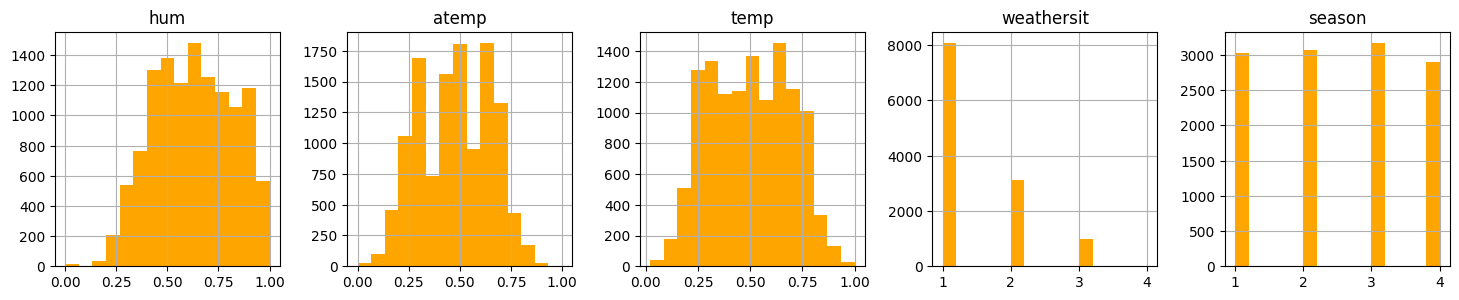

In [6]:
# Histogram bagian data2 numeric

numeric = ['hum', 'atemp', 'temp', 'weathersit', 'season']
df[numeric].hist(bins=15, figsize=(18, 7), layout=(2, 5), color='orange');

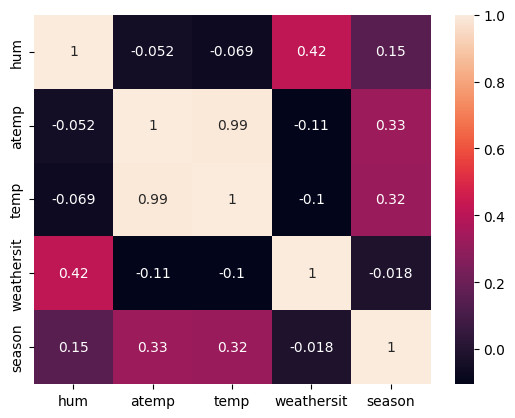

In [7]:
sns.heatmap(df[numeric].corr(), annot=True)
plt.show()

In [8]:
(df['temp']-df['atemp']).mean()

0.021188721742704496

Fitur temp dan atemp memiliki tingkat korelasi yang sangat tinggi.
</br>Dimana keduanya juga me-representasikan temperatur pada jam tersebut sehingga dapat digunakan salah satu saja.

## **Data Preprocessing**

Lanjut masuk pda tahap data preprocessing, pada tahap ini akan dilakukan proses cleaning data. Dataset yang sudah bersih kemudian akan digunakan untuk proses analisis lebih lanjut. Berikut tahap-tahap yang akan dilakukan :

 - Melakukan penghapusan data duplicate.
 - Jika didapati kesalahan tipe data, makan akan diubah ke tipe yang lebih tepat.
 - Melakukan drop pada fitur yang tidak memiliki relevansi dengan permasalahan saat ini.
 - Menambahkan atau add fitur yang memiliki kemungkinan relevansi terhadap permasalahan saat ini.
 - Jika didapati adanya missing value, maka dilakukan treatment yang sesuai (drop fitur, digantikan dengan nilai yang sesuai, drop data, dll).
 - Terakhir bila terdapat data outlier, maka akan dilakukan penanganan yang sesuai.
 
Untuk proses data preprocessing dan feature engineering, akan digunakan dataframe duplikasi dari dataframe yang sebelumnya digunakan.

In [9]:
# Membuat duplikasi dataframe
df_model = df.copy()

**Add Feature**

In [10]:
# Melakukan penambahan month, year, dayname pada fitur dteday
month=[]
year=[]
day=[]
df_model['month'] = pd.to_datetime(df_model['dteday']).dt.month
df_model['year'] = pd.to_datetime(df_model['dteday']).dt.year
df_model['day'] = pd.to_datetime(df_model['dteday']).dt.day_of_week

In [12]:
# Pengecekan info secara lebih terperinci untuk setiap fiturnya
listItem = []

for col in df_model.columns:
    listItem.append([
        col, 
        df_model[col].dtype, 
        df_model[col].isna().sum(), 
        round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
        df_model[col].nunique(), 
        list(df_model[col].drop_duplicates().sample(2).values)
    ]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,dteday,object,0,0.0,731,"[2011-09-12, 2011-02-11]"
1,hum,float64,0,0.0,89,"[0.17, 0.81]"
2,weathersit,int64,0,0.0,4,"[2, 4]"
3,holiday,int64,0,0.0,2,"[0, 1]"
4,season,int64,0,0.0,4,"[4, 3]"
5,atemp,float64,0,0.0,65,"[0.7273, 0.3182]"
6,temp,float64,0,0.0,50,"[0.02, 0.74]"
7,hr,int64,0,0.0,24,"[2, 21]"
8,casual,int64,0,0.0,305,"[257, 239]"
9,registered,int64,0,0.0,742,"[79, 212]"


**Data Duplicate**

In [13]:
# Pengecekan data duplikat
df_model.duplicated().sum()

0

Tidak didapati adanya duplikat data

**Drop Fitur & Data**

Perlu dilakukan pertimbangan sebelum melakukan drop pada kolom atau fitur. Berikut beberapa fitur yang akan di drop beserta reason mengapa dilakukan drop data :

 - Fitur 'casual' dan 'registered' tidak diperlukan dalam analisis, karena tujuannya berfokus pada total seluruh persewaan saja.
 - Fitur 'atemp' akan dihapus karena terdapat fitur 'temp', dimana keduanya merepresentasikan temperatur dengan korelasi yang cukup tinggi.
 - Fitur 'dteday' akan dihapus karena sebelumnya telah dibuat fitur month, year, dan dayname.

In [14]:
df_model.drop(['casual', 'registered', 'atemp', 'dteday'], axis=1, inplace=True)

**Tipe Data**

In [15]:
df_model = df_model.astype({"weathersit":'category', "season":'category', "holiday":'category'})

**Rename Columns**

In [16]:
df_model.rename({
    'hum' : 'Humidity',
    'weathersit' : 'Weather',
    'season' : 'Season',
    'temp' : 'Temperature',
    'hr' : 'Hour',
    'cnt' : 'Count',
    'month' : 'Month',
    'year' : 'Year',
    'day' : 'Day',
    'holiday' : 'Holiday'
} , inplace = True , axis = 1)

In [17]:
df_model.head()

,Humidity,Weather,Holiday,Season,Temperature,Hour,Count,Month,Year,Day
0,0.62,1,0,4,0.36,16,250,12,2011,4
1,0.64,1,0,2,0.54,4,18,6,2012,6
2,0.53,1,0,2,0.62,23,107,6,2011,2
3,0.87,2,0,2,0.36,8,145,3,2012,5
4,0.55,1,0,3,0.76,18,857,7,2012,1


- Selanjutnya, kita juga perlu melakukan pengeceka apakah terdapat nilai-nilai yang dirasa tidak masuk akal pada setiap fiturnya.
- Seperti contoh adanya nilai yang kurang dari 0, disini dapat dilakukan pengecekan dengan menggunakan statistika deskriptif untuk tiap numerikal fitur.

In [18]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,Humidity,Temperature,Hour,Count,Month,Year,Day
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,0.498185,11.519770,189.271023,6.510974,2011.501932,3.005261
std,0.192102,0.192492,6.931872,181.223903,3.433995,0.500017,1.992993
min,0.000000,0.020000,0.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.470000,0.340000,6.000000,40.000000,4.000000,2011.000000,1.000000
50%,0.620000,0.500000,12.000000,142.000000,7.000000,2012.000000,3.000000
75%,0.780000,0.660000,18.000000,282.000000,9.000000,2012.000000,5.000000
max,1.000000,1.000000,23.000000,970.000000,12.000000,2012.000000,6.000000


**Correlation Matrix**

Text(0.5, 1.0, 'Correlation Matrix')

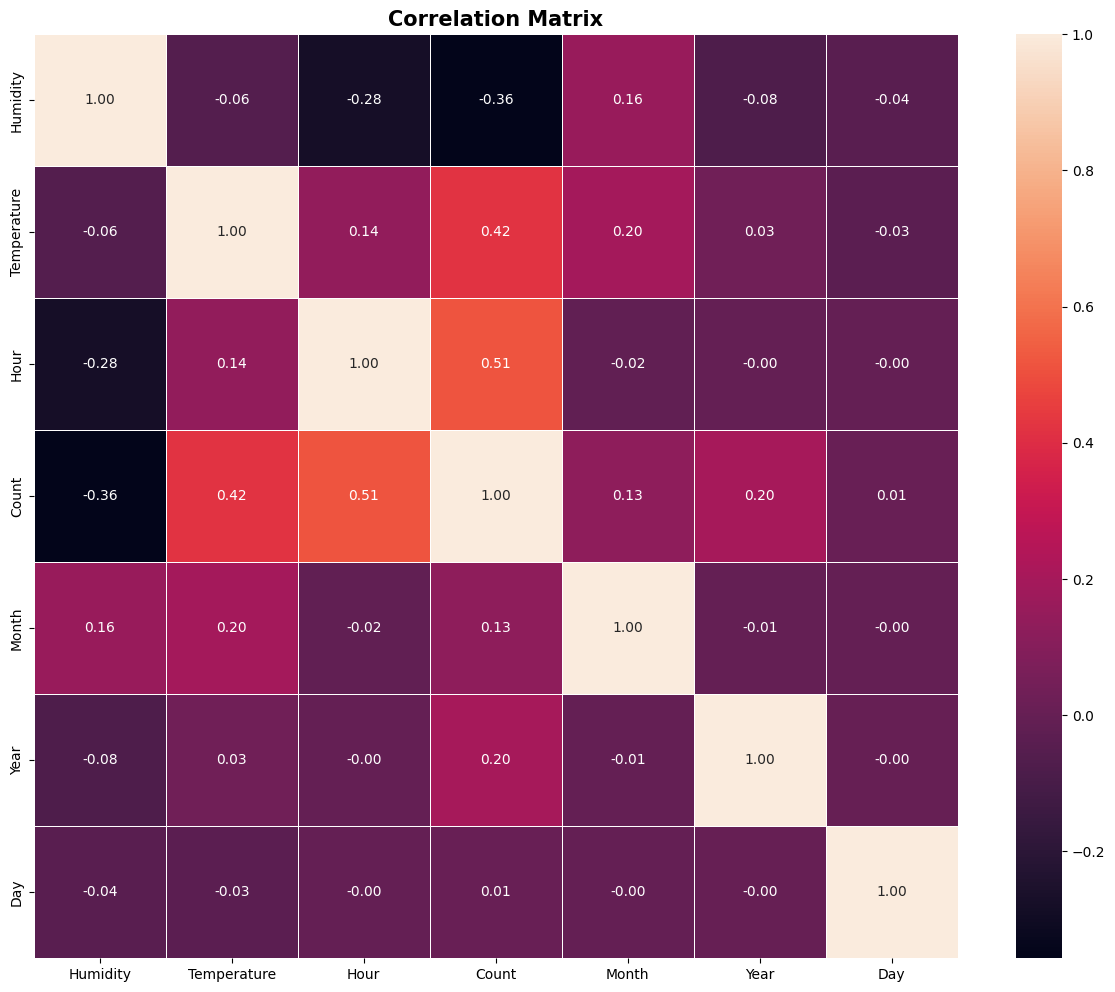

In [19]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='rocket', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

- Dari hasil heatmap diatas, dapat dilihat bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur `Count`. Korelasi paling tinggi dimiliki oleh fitur `Temperature` dan `Hour`, di mana korelasi yang terbentuk adalah korelasi positif. Ini menunjukan bahwa semakin besar nilai temperature dan hour atau semakin tinggi nilai temperature saat itu dan semakin lama waktu peminjaman, maka jumlah persewaaan pun semakin banyak.

In [20]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Humidity     12165 non-null  float64 
 1   Weather      12165 non-null  category
 2   Holiday      12165 non-null  category
 3   Season       12165 non-null  category
 4   Temperature  12165 non-null  float64 
 5   Hour         12165 non-null  int64   
 6   Count        12165 non-null  int64   
 7   Month        12165 non-null  int64   
 8   Year         12165 non-null  int64   
 9   Day          12165 non-null  int64   
dtypes: category(3), float64(2), int64(5)
memory usage: 701.6 KB


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [22]:
calc_vif(df_model[['Humidity', 'Season', 'Temperature', 'Hour', 'Count']])

,variables,VIF
0,Humidity,6.631105
1,Season,6.907225
2,Temperature,8.651352
3,Hour,3.819242
4,Count,3.127051


Selanjutnya, dilakukan pengecekan pada distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang bisa dilakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

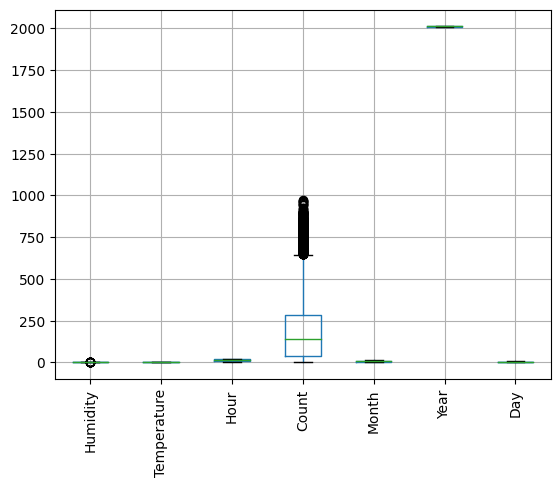

In [23]:
# Menggunakan boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

In [24]:
# Membuat function untuk mengecek data outliers
def cek_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    batas = iqr*1.5
    print(f'IQR: {iqr}')

    batas_bawah = q1 - batas
    batas_atas = q3 + batas
    print(f'batas_bawah: {batas_bawah}')
    print(f'batas_atas: {batas_atas}')        

In [25]:
# Outliers pada fitur humidity
cek_outliers(df_model['Humidity'])

IQR: 0.31000000000000005
batas_bawah: 0.004999999999999893
batas_atas: 1.245


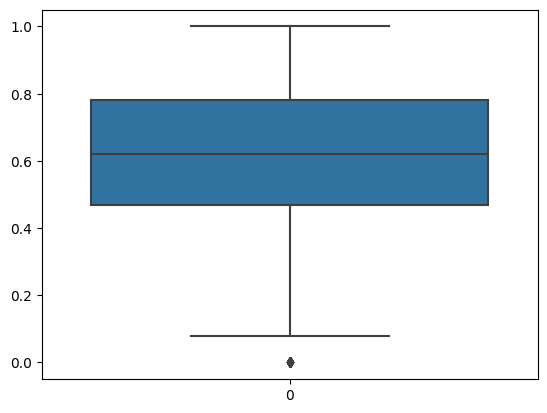

In [26]:
sns.boxplot(df_model['Humidity'])
plt.show()

In [27]:
# Outliers pada fitur temperature
cek_outliers(df_model['Temperature'])

IQR: 0.32
batas_bawah: -0.13999999999999996
batas_atas: 1.1400000000000001


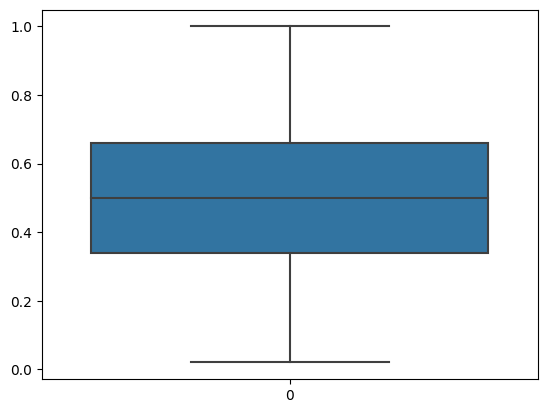

In [28]:
sns.boxplot(df_model['Temperature'])
plt.show()

In [29]:
# Outliers pada fitur count
cek_outliers(df_model['Count'])

IQR: 242.0
batas_bawah: -323.0
batas_atas: 645.0


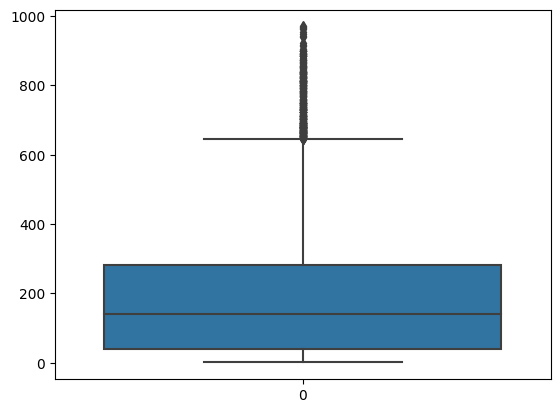

In [30]:
sns.boxplot(df_model['Count'])
plt.show()

Terdapat outliers pada `Humidity` serta `Count`. Untuk mengatasinya, akan dihilangkan data outliers tersebut.
<br> Selanjutnya, prediksi dapat dilakukan pada rentang data sesuai dataset yang sudah bersih agar hasil prediksi tidak bias.

Lalu, dapat memulai untuk feature engineering terhadap fitur-fitur numerikal.

**Humidity**

In [31]:
# Cek statistik deskriptif untuk kolom humidity
df_model['Humidity'].describe()

count    12165.000000
mean         0.625451
std          0.192102
min          0.000000
25%          0.470000
50%          0.620000
75%          0.780000
max          1.000000
Name: Humidity, dtype: float64

In [32]:
# Cek humidity diantara 0.00499 and 1.245
df_model[(df_model['Humidity'] > 1.245) | (df_model['Humidity'] < 0.00499)].count()['Humidity']

14

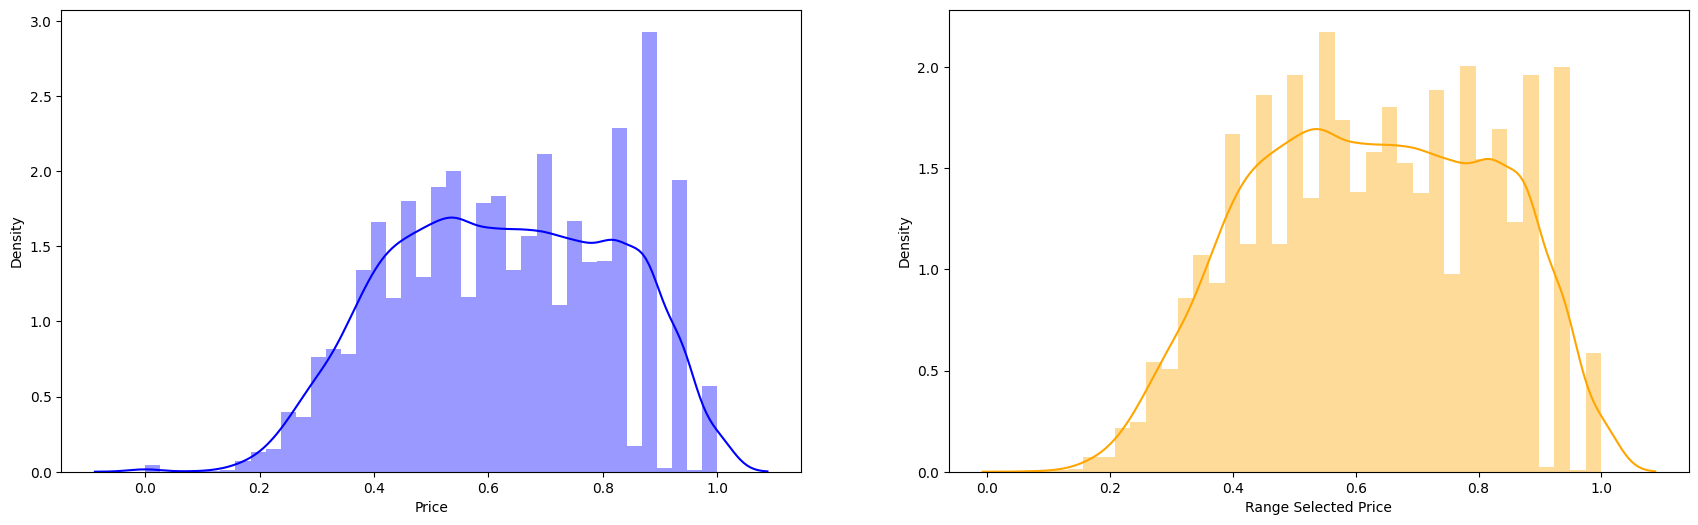

In [33]:
# Melakukan filtering data
df_model = df_model[(df_model['Humidity'] <= 1.245) & (df_model['Humidity'] >= 0.00499)]

# Plot distribusi data sebelum dan setelah dilakukan filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['hum'], ax=axes[0], color= 'blue')
sns.distplot(df_model['Humidity'], ax=axes[1], color='orange')
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

In [34]:
# Cek deskriptif statistik kolom 'Humidity' setelah filtering
df_model['Humidity'].describe()

count    12151.000000
mean         0.626172
std          0.191036
min          0.080000
25%          0.480000
50%          0.620000
75%          0.780000
max          1.000000
Name: Humidity, dtype: float64

**Temperature**

In [35]:
# Cek statistik deskriptif untuk kolom Temperature
df_model['Temperature'].describe()

count    12151.000000
mean         0.498313
std          0.192562
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: Temperature, dtype: float64

In [36]:
# Cek Temperature diantara -0.0985499 and 1.0530499
df_model[(df_model['Temperature'] > 1.0530499) | (df_model['Temperature'] < -0.0985499)].count()['Temperature']

0

**Count**

In [37]:
# Cek statistik deskriptif untuk kolom Count
df_model['Count'].describe()

count    12151.000000
mean       189.457329
std        181.242898
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: Count, dtype: float64

In [38]:
# Cek Count diantara -323.0 and 645.0
df_model[(df_model['Count'] > 645.0) | (df_model['Count'] < -323.0)].count()['Count']

338

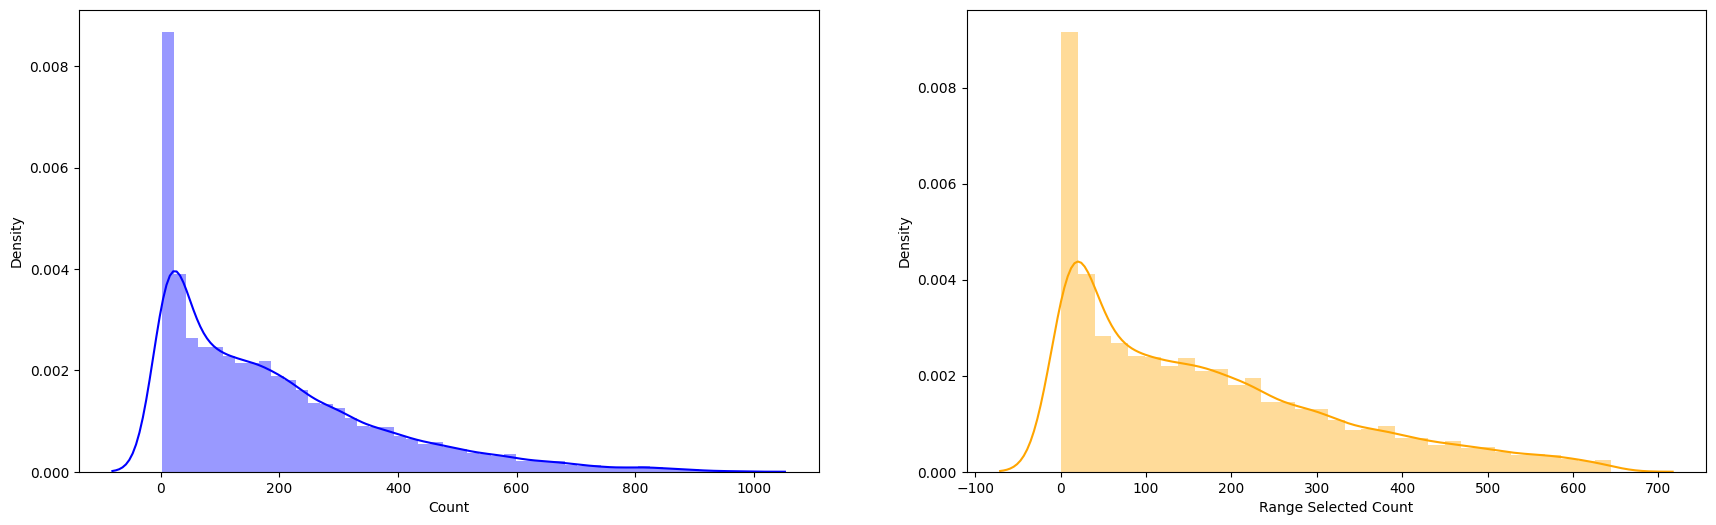

In [39]:
# Melakukan filtering data
df_model = df_model[(df_model['Count'] <= 645.0) & (df_model['Count'] >= -323.0)]

# Plot distribusi data sebelum dan setelah dilakukan filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['cnt'], ax=axes[0], color='blue')
sns.distplot(df_model['Count'], ax=axes[1], color='orange')
axes[0].set_xlabel('Count')
axes[1].set_xlabel('Range Selected Count');

In [41]:
# Cek deskriptif statistik kolom 'Count' setelah filtering
df_model['Count'].describe()

count    11813.000000
mean       173.384238
std        155.931763
min          1.000000
25%         38.000000
50%        136.000000
75%        267.000000
max        645.000000
Name: Count, dtype: float64

**Clean Dataset**

In [40]:
df_model.head()

,Humidity,Weather,Holiday,Season,Temperature,Hour,Count,Month,Year,Day
0,0.62,1,0,4,0.36,16,250,12,2011,4
1,0.64,1,0,2,0.54,4,18,6,2012,6
2,0.53,1,0,2,0.62,23,107,6,2011,2
3,0.87,2,0,2,0.36,8,145,3,2012,5
5,0.72,1,0,4,0.46,0,45,10,2012,0


Setelah dilakukan pembersihan data (Data Cleaning), tersisa 11813 data yang akan digunakan untuk pemodelan.

## **Modeling**

In [41]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [42]:
df_model.describe(include='all')

,Humidity,Weather,Holiday,Season,Temperature,Hour,Count,Month,Year,Day
count,11813.000000,11813.0,11813.0,11813.0,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000
unique,NaN,4.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7802.0,11452.0,3043.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.629196,NaN,NaN,NaN,0.494350,11.438585,173.384238,6.487514,2011.488360,3.014983
std,0.190793,NaN,NaN,NaN,0.192538,6.979256,155.931763,3.455726,0.499886,1.999457
min,0.080000,NaN,NaN,NaN,0.020000,0.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.480000,NaN,NaN,NaN,0.340000,5.000000,38.000000,3.000000,2011.000000,1.000000
50%,0.630000,NaN,NaN,NaN,0.500000,11.000000,136.000000,6.000000,2011.000000,3.000000
75%,0.790000,NaN,NaN,NaN,0.660000,18.000000,267.000000,9.000000,2012.000000,5.000000


**Encoding**

Agar dapat menggunakan semua feature yang dipilih, maka feature-feature kategorikal perlu diubah menjadi feature numerikal.
<br> Hal tersebut dapat dengan menggunakan Column Transformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [50]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown = 'ignore'), ['Season', 'Weather', 'Holiday']),
    ('Binary', ce.BinaryEncoder(), ['Day'])
], remainder='passthrough')

**Data Splitting**

In [51]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['Count'], axis=1)
y = df_model['Count']

**Train & Test Splitting**

In [52]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=200)

**Choose a Benchmark Model**

In [53]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=200)
rf = RandomForestRegressor(random_state=200)
xgb = XGBRegressor(random_state=200)

In [55]:
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

score_msle = []
nilai_mean_msle = []
nilai_std_msle = []

# Mencari algoritma terbaik berdasarkan nilai MAE, MAPE, RMSE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())
    
    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

    # R2
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
        )
    
    print(model_cv_r2, i)

    score_r2.append(model_cv_mape)
    nilai_mean_r2.append(model_cv_mape.mean())
    nilai_std_r2.append(model_cv_mape.std())

[-135.79361402 -148.0091921  -140.74212445 -141.9179333  -147.12750079] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -92.31145758 -100.23756194  -94.64580222  -95.65321862 -100.95344795] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.35064105 -1.45356072 -1.28851304 -1.42326993 -1.33059515] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.21886164 0.13291534 0.20168212 0.14873018 0.13356664] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-91.67187738 -99.55335267 -97.07597335 -96.58619508 -95.7409406 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-59.64

In [56]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'STD_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'STD_MAPE': nilai_std_mape,
    'Mean_RMSE': nilai_mean_rmse,
    'STD_RMSE': nilai_std_rmse,
    'Mean_Rsquare' : nilai_mean_r2,
    'STD_Rsquare' : nilai_std_r2
})

,Model,Mean_MAE,STD_MAE,Mean_MAPE,STD_MAPE,Mean_RMSE,STD_RMSE,Mean_Rsquare,STD_Rsquare
0,Linear Regression,-96.760298,3.321529,-1.369316,0.060639,-142.718073,4.470609,-1.369316,0.060639
1,KNN Regressor,-60.701986,1.024514,-0.847602,0.081172,-96.125668,2.563141,-0.847602,0.081172
2,DecisionTree Regressor,-36.508560,1.125447,-0.400248,0.032874,-61.099679,2.678783,-0.400248,0.032874
3,RandomForest Regressor,-27.894157,1.071488,-0.288766,0.011904,-46.302832,2.491689,-0.288766,0.011904
4,XGBoost Regressor,-25.777482,0.870234,-0.264683,0.007395,-42.322132,2.636047,-0.264683,0.007395


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residu atau error-nya dipangkatkan terlebih dahulu sebelum dirata-ratakan.

Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Atau terdapat nilai-nilai error yang besar, yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

Berdasarkan nilai keempat matriks tersebut, XGBoost adalah model terbaik, karena memiliki performa nilai MAE (25.777482) yang lebih baik dibandingkan model lainnya. Berikutnya kita akan melakukan prediksi pada Test Set dengan menggunakan benchmark model yaitu XGBoost. 

**Teori Singkat Mengenai XGBoost**

Gradient boosting adalah algoritma supervised learning yang dapat memprediksi variabel target secara akurat dengan mengkombinasikan perkiraan satu set model yang lebih sederhana dan lemah. Saat menggunakannya untuk regresi, pembelajaran yang lemah adalah regression tree, setiap regression tree memetakan input data point ke salah satu daun yang berisi continuous score.

Untuk gradient boosting, dapat dianalogikan dengan sekelompok orang dimana setiap orangnya mencoba menyelesaikan kesalahan yang dibuat oleh seseorang yang sebelumnya telah melakukan keputusan. Kemudian mereka akan mencoba menemukan solusi terbaik untuk masalah tersebut.

Extreme Gradient Boosting (XGBoost) merupakan salah satu model yang termasuk ke dalam *similar type ensemble method*. Di dalam algoritma ini, *Decision Trees* dibuat dalam bentuk yang sekuensial, dimana bobot memiliki peran yang penting dalam XGBoost. Bobot diterapkan kepada semua variabel independen yang nantinya akan dimasukkan ke dalam *Decision Trees* untuk memprediksi hasil. Bobot dari variabel yang diprediksi salah akan ditambahkan dan variabel ini akan dimasukkan ke dalam *Decision Tree* yang berikutnya [(sumber teori)](https://www.geeksforgeeks.org/xgboost/). Model ini termasuk ke dalam *non-interpretable* model dikarenakan kita tidak dapat mengetahui variabel mana yang salah diprediksi. XGBoost memiliki kinerja yang baik karena termasuk model yang robust untuk berbagai jenis data.

XGBoost juga meminimalkan fungsi objektif yang diregularisasi (L1 dan L2) yang menggabungkan convex loss function (berdasarkan selisih antara output target dan prediksi) dan penalty term untuk kompleksitas model (dengan kata lain, fungsi regression tree). Trainingnya akan berulang, menambahkan tree baru yang memprediksi error dari tree sebelumnya, yang dikombinasikan dengan pohon sebelumnya untuk menghasilkan hasil/nilai prediksi akhir. Disebut gradient boosting karena menggunakan algoritma turunan dari gradient untuk meminimalkan kerugian saat menambahkan model baru.

Penjelasan lain terkait XGBoost : https://towardsdatascience.com/xgboost-theory-and-practice-fb8912930ad6



**Predict to Test Set with the Benchmark Model**

In [57]:
# Benchmark model terbaik
models = {
    'XGB': XGBRegressor(random_state=200),
}

score_mae = []
score_mape = []
score_rmse = []
score_r2 = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape, 'RMSE': score_rmse, 'Rsquare': score_r2}, index=models.keys())
score_before_tuning

,MAE,MAPE,RMSE,Rsquare
XGB,25.774804,0.435109,40.800221,0.930386


Ketika dilakukan prediksi pada test set, performa XGBoost terlihat cukup baik dan tidak memiliki berbedaan signifikan dengan train set. Sehingga, dapat diartikan bahwa model tidak mengalami overfitting atau underfitting.

**Hyperparameter Tuning**

Selanjutnya, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Berikut ini panduan dan beberapa tips untuk XGBoost Hyperparameter Tuning :

https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [58]:
# Kedalaman pohon. Semakin dalam kemungkinan meningkatkan performance, namun juga kompleksitas dan kemungkinan overfit.
# value integer > 0. Defaultnya 6.
max_depth = list(np.arange(5, 16)) # 5 - 15

# Learning rate. Menentukan ukuran step pada tiap iterasi sementara model mengoptimalkan ke arah tujuannya.
# Learning rate rendah membuat komputasi lebih lambat, dan perlu lebih banyak putaran untuk mencapai pengurangan di
# residual error yang sama seperti model dengan learning rate tinggi. Namun akan mengoptimalkan peluang untuk mencapai best optimum.
# Nilainya 0 - 1. Defaultnya 0,3.
learning_rate = list(np.arange(1, 10)/10) # 0.1 - 0.9

# Jumlah pohon di ensemble. Ekuivalen dengan total round dari boosting.
# value integer > 0. Defaultnya 100.
n_estimators = list(np.arange(100, 300)) # 100 - 299

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set). Mewakili kolom yang akan diambil samplenya
# secara acak untuk tiap tree. Kemungkinan dapat meningkatkan overfitting.
# value antara 0 - 1. Defaultnya 1.
colsample_bytree = list(np.arange(1, 10)/10) # 0.1 - 0.9

# Jumlah baris tiap pohon (% dari total baris train set). Mewakili feaction observations yang akan dijadikan sample per tree.
# Nilai lebih rendah dapat mencegah overfitting tapi bisa menyebabkan underfitting.
# value antara 0 - 1. Defaultnya 1.
subsample = list(np.arange(1, 10)/10) # 0.1 - 0.9

# Alpha. L1 regularization pada weights (Lasso Regression). Dapat meningkatkan speed performance saat featurenya banyak.
# Semakin besar nilainya, semakin konservatif/simpel modelnya
# Defaultnya 0.
reg_alpha = list(np.logspace(-1, 1, 10)) # 0.1 - 10

# Lambda. L2 regulatization pada weights (Ridge Regression). Dapat menurunkan overfitting.
# Defaultnya 1.
reg_lambda = list(np.logspace(-1, 1, 10)) # 0.1 - 10

# Gamma (min_impurity_decrease). Pseudo-regulatization parameter, bergantung pada parameter lainnya.
# Semakin besar nilainya, semakin konservatif/simpel modelnya.
# Integer berapapun. Defaultnya 0.
gamma = list(np.arange(5, 16)) # 5 - 15

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    'model__reg_lambda': reg_lambda
}

In [77]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=200, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 200  
)

In [78]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['Season',
                                                                                'Weather',
                                                                                'Holiday']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Day'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor...
                                                              0.2782559402207124,
                                                              0.46415888336127786,
                                                              0.774263682681127,
                                                              1.291549665014884,
                                                              2.1544346900318834,
                                                              3.593813663804626,
                                                              5.994842503189409,
                                                              10.0],
                                        'model__subsample': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=200, refit='neg_root_mean_squared_error',
                   scoring=['neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error',
                            'neg_root_mean_squared_error'])

In [79]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -41.445958246369024
Best_params: {'model__subsample': 0.7, 'model__reg_lambda': 0.46415888336127786, 'model__reg_alpha': 0.774263682681127, 'model__n_estimators': 113, 'model__max_depth': 7, 'model__learning_rate': 0.1, 'model__gamma': 7, 'model__colsample_bytree': 0.9}


In [82]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MAE, MAPE, RMSE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_lambda,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,...,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
33,1.329150,0.018838,0.018897,0.003500,0.7,0.464159,0.774264,113,7,0.1,...,0.010719,1,-38.899615,-44.092032,-42.944082,-39.976996,-41.317066,-41.445958,1.892322,1
9,2.080104,0.020750,0.026300,0.003488,0.9,1.29155,0.278256,192,8,0.2,...,0.019514,2,-39.550996,-44.725753,-43.850557,-38.758500,-42.740727,-41.925307,2.361356,2
3,3.972410,0.060802,0.057378,0.003563,0.7,10.0,2.154435,261,13,0.1,...,0.017437,7,-41.280627,-45.488436,-45.123078,-40.500124,-43.895669,-43.257587,2.018706,3
26,2.338177,0.035010,0.026301,0.003026,0.4,10.0,0.464159,269,6,0.3,...,0.015456,8,-42.159949,-46.229855,-45.305626,-40.847683,-44.309260,-43.770475,1.991584,4
46,2.024663,0.028024,0.022302,0.002441,0.8,2.154435,0.774264,266,6,0.4,...,0.046640,12,-41.002671,-46.990811,-46.099439,-41.980938,-45.706522,-44.356076,2.395473,5


**Predict Test Set With Tuned Model**

In [83]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=200)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'RMSE': rmse_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,MAPE,RMSE
XGB,25.082641,0.386078,40.336543


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [84]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,MAE,MAPE,RMSE,Rsquare
XGB,25.774804,0.435109,40.800221,0.930386


In [85]:
score_after_tuning

,MAE,MAPE,RMSE
XGB,25.082641,0.386078,40.336543


Dapat dilihat bahwa setelah dilakukan hyperparameter tuning, model mengalami peningkatan performa.

- MAE, MAPE & RMSE sebelum tuning: 25.774804, 0.435109, 40.800221
- MAE, MAPE & RMSE setelah tuning: 25.082641, 0.386078, 40.336543

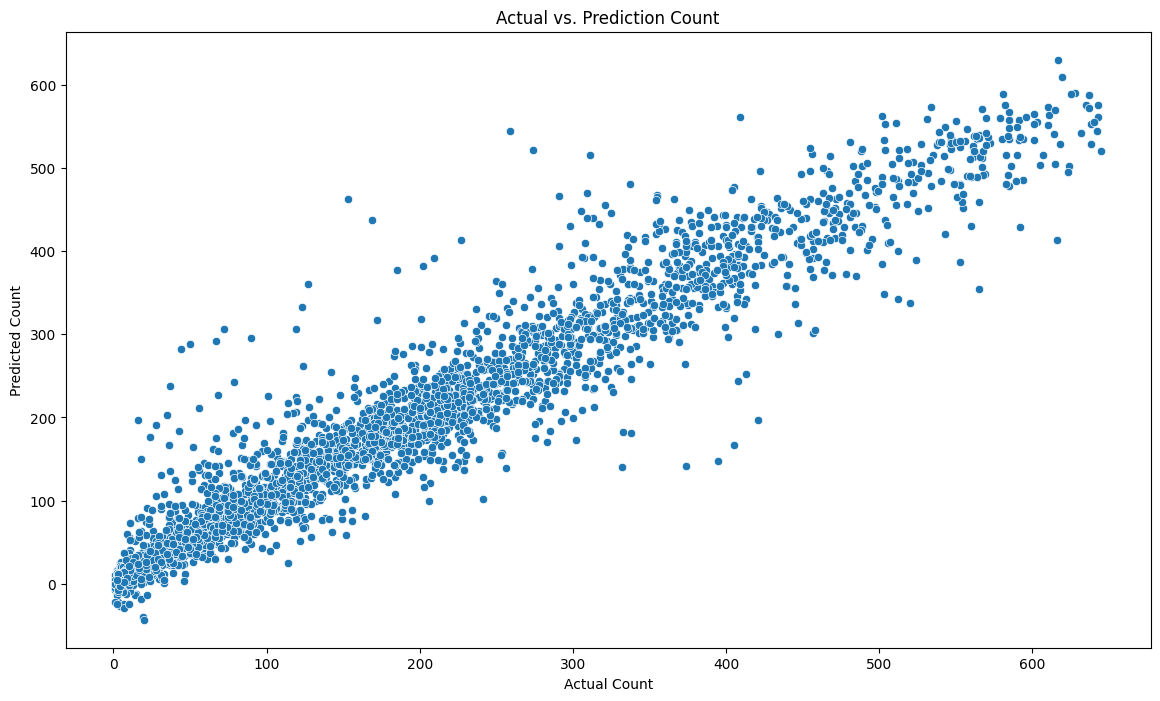

In [86]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count');

Dari scatterplot diatas, terlihat bahwa hasil prediksi yang diperoleh cukup baik. Namun masih terdapat kemungkinan bias.

# Conclusion & Recommendation

Berdasarkan pemodelan yang telah dilakukan, fitur 'Hour' merupakan fitur yang paling berpengaruh terhadap 'Count'. 

Untuk matriks evaluasi yang digunakan adalah RMSE, MAE, dan MAPE. Nilai RMSE yang dihasilkan setelah hyperparameter tuning adalah 40.336543. Sehingga dapat disimpulkan bahwa, model akan digunakan untuk memperkirakan penyewa sepeda pada rentang nilai sesuai model yang dilatih (maksimal Count 645).

Maka perkiraan penyewa dapat meleset kurang lebih 40 orang dari total keseluruhan. Namun dapat terjadi kesalahan lebih jauh juga karena masih terdapat bias yang terlihat dari visualisasi data prediksi dan aktual. Bias dapat terjadi karena masih kurangnya fitur pada dataset untuk merepresentasikan keadaan dimana orang akan memutuskan untuk menyewa sepeda, seperti lokasi station, adanya event tertentu, dan lain - lain.

Rekomendasi yang dapat dilakukan untuk pengembangan model yang lebih baik, seperti :

 1. Penambahan fitur yang lebih korelatif dengan target (`Count`) seperti diadakannya event khusus, selain itu dapat dipertimbangkan juga mengenai jarak lokasi station dengan lokasi perkantoran, sekolah, atau tempat wisata. Dimana merupakan tempat yang cukup strategis karena area-area tersebut merupakan area yang cukup padat dilalui orang-orang serta kebutuhan untuk bisa sampai tujuan tepat waktu tanpa terlambat.
 
 2. Melakukan penambahan data. Jika terdapat data lebih banyak dibandingkan dataset yang digunakan saat ini, dirasa dapat dianalisis dengan lebih baik lagi. Dapat juga digunakan model yang lebih kompleks untuk proses pemodelannya untuk dibandingan dan dicari model dengan error yang paling sedikit, serta hal tersebut dapat membantu dalam meningkatkan akurasi prediksi dari model.
 
 3. Model yang sudah dibuat juga dapat dimanfaatkan untuk melakukan pengembangan lainnya. Seperti dalam pembuatan model untuk memprediksi harga rental, atau dapat juga digunakan untuk pembuatan model dalam memprediksi total unit sepeda yang disewa pada lokasi tertentu. Dimana kedepannya dapat dianalisa sebagai pertimbangan untuk menambah stasiun sepeda di lokasi-lokasi yang strategis.

# Save Model

In [98]:
# Save model
import pickle

# final_model = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# final_model.fit(X_train, y_train)
final_model = random_xgb.best_estimator_.fit(X_train, y_train)

pickle.dump(final_model, open('Create_XGB_Model_BikeSharing.sav', 'wb'))

In [99]:
# Load model
filename = 'Create_XGB_Model_BikeSharing.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [100]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

40.33654258168992